## Flight Delay Predictor


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
-This project aims to predict flight delays during takeoff and landing with minute-level precision. The goal is to determine whether there will be a delay and accurately predict the duration of the delay.


### 2) Data Collection
- Dataset Source - kaggle
- The data consists of 24 column and around 3647 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Data Pre-processing

<h>df = pd.read_csv('raw_data.csv')<br>
df = df.dropna(subset=['FLIGHT'])<br>
df = df.dropna(subset=['scheduled_departures'])<br>
df = df[df['actual_departures'] != '—']<br>
df = df[(df['TEMPERRATURE_departures'] != '—') & pd.notna(df['TEMPERRATURE_departures'])]<br>
df = df[df['WIND_departures'] != 'Calm']<br>
df = df[df['DIRECTION_departures'] != 'Variable']<br>
df.to_csv('arrivals10.csv', index=False)
</h>

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/flight_Data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,DATE,TIME,FLIGHT,FROM,TO,AIRLINE,AIRCRAFT,STATUS,TEMPERRATURE_departures,WIND_departures,...,scheduled_departures,actual_departures,scheduled_arrival,actual_arrival,delay_departure,direction_departure,delay_arrival,direction_arrival,scheduled_departure_hour,scheduled_arrival_hour
0,"Tuesday, May 16",12:20,U21265,Basel (BSL),Tel_Aviv,easyJet,A320 (HB-JXO),Landed 12:26,11,8,...,7:15,7:20,12:20,12:26,5,1,6,1,7,12
1,"Tuesday, May 16",12:20,7L218,Baku (GYD),Tel_Aviv,Silk Way West Airlines,B744 (4K-SW888),Landed 20:29,14,6,...,10:00,18:37,12:20,20:29,517,1,489,1,10,12
2,"Tuesday, May 16",12:35,TK862,Istanbul (IST),Tel_Aviv,Turkish Airlines,A320 (TC-JPH),Landed 13:04,14,10,...,10:30,11:03,12:35,13:04,33,1,29,1,10,12
3,"Tuesday, May 16",12:40,GF972,Bahrain (BAH),Tel_Aviv,Gulf Air,A21N (A9C-NC),Landed 12:24,31,4,...,9:50,9:50,12:40,12:24,0,0,-16,-1,9,12
4,"Tuesday, May 16",12:50,A3526,Rhodes (RHO),Tel_Aviv,Aegean Airlines,A320 (SX-DVX),Landed 12:43,19,10,...,11:20,11:28,12:50,12:43,8,1,-7,-1,11,12


#### Shape of the dataset

In [4]:
df.shape

(3647, 24)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

DATE                        0
TIME                        0
FLIGHT                      0
FROM                        0
TO                          0
AIRLINE                     0
AIRCRAFT                    0
STATUS                      0
TEMPERRATURE_departures     0
WIND_departures             0
DIRECTION_departures        0
TEMPERRATURE_arrival        0
WIND_arrival                0
DIRECTION_arrival           0
scheduled_departures        0
actual_departures           0
scheduled_arrival           0
actual_arrival              0
delay_departure             0
direction_departure         0
delay_arrival               0
direction_arrival           0
scheduled_departure_hour    0
scheduled_arrival_hour      0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DATE                      3647 non-null   object
 1   TIME                      3647 non-null   object
 2   FLIGHT                    3647 non-null   object
 3   FROM                      3647 non-null   object
 4   TO                        3647 non-null   object
 5   AIRLINE                   3647 non-null   object
 6   AIRCRAFT                  3647 non-null   object
 7   STATUS                    3647 non-null   object
 8   TEMPERRATURE_departures   3647 non-null   int64 
 9   WIND_departures           3647 non-null   int64 
 10  DIRECTION_departures      3647 non-null   int64 
 11  TEMPERRATURE_arrival      3647 non-null   int64 
 12  WIND_arrival              3647 non-null   int64 
 13  DIRECTION_arrival         3647 non-null   object
 14  scheduled_departures    

### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

DATE                           2
TIME                         392
FLIGHT                      3322
FROM                         429
TO                            10
AIRLINE                      306
AIRCRAFT                    2208
STATUS                      1226
TEMPERRATURE_departures       42
WIND_departures               13
DIRECTION_departures          36
TEMPERRATURE_arrival           9
WIND_arrival                   7
DIRECTION_arrival             11
scheduled_departures         325
actual_departures           1231
scheduled_arrival            392
actual_arrival              1219
delay_departure              186
direction_departure            3
delay_arrival                197
direction_arrival              3
scheduled_departure_hour      24
scheduled_arrival_hour        24
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,TEMPERRATURE_departures,WIND_departures,DIRECTION_departures,TEMPERRATURE_arrival,WIND_arrival,delay_departure,direction_departure,delay_arrival,direction_arrival,scheduled_departure_hour,scheduled_arrival_hour
count,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000
mean,17.780093,8.100356,172.624075,19.552509,7.850836,29.785029,0.929257,5.601316,0.012613,13.169180,14.651494
std,7.652843,3.545073,114.614462,8.290358,3.354975,42.661218,0.355872,32.606214,0.990550,5.425823,5.601163
min,0.000000,2.000000,10.000000,13.000000,4.000000,-936.000000,-1.000000,-167.000000,-1.000000,0.000000,0.000000
25%,13.000000,6.000000,60.000000,15.000000,6.000000,13.000000,1.000000,-12.000000,-1.000000,9.000000,11.000000
50%,16.000000,8.000000,170.000000,16.000000,8.000000,23.000000,1.000000,0.000000,0.000000,14.000000,15.000000
75%,21.000000,10.000000,280.000000,20.000000,10.000000,39.000000,1.000000,17.000000,1.000000,18.000000,19.000000
max,41.000000,25.000000,360.000000,39.000000,23.000000,727.000000,1.000000,639.000000,1.000000,23.000000,23.000000


#### Insight ???
- From above description of numerical data, the means of the delay_arrival is around 5 minutes and that of the delay_departure is approx. 30 minutes. 
- The standard deviations of the WIND_departures is 3.5 and of TEMPERATURE_departure is 7.6 i.e. the wind conditions are not in extreme variation whereas the temperatures are varied. Similar is the scenario for the arrival weather conditions. 


### part 4 -Visualization and EDA:
At this stage, we are visualizing the database for graphs, divided into 3 parts:
1) Visualization of a single variable                                                                                           
2) Visualization of two variables in a two-dimensional graph.
3) correlation, and Poisson's coefficient test in order to check the relationship between the columns.                                                                                                
3) Visualization of several variables.

In [10]:
df.head()

,DATE,TIME,FLIGHT,FROM,TO,AIRLINE,AIRCRAFT,STATUS,TEMPERRATURE_departures,WIND_departures,...,scheduled_departures,actual_departures,scheduled_arrival,actual_arrival,delay_departure,direction_departure,delay_arrival,direction_arrival,scheduled_departure_hour,scheduled_arrival_hour
0,"Tuesday, May 16",12:20,U21265,Basel (BSL),Tel_Aviv,easyJet,A320 (HB-JXO),Landed 12:26,11,8,...,7:15,7:20,12:20,12:26,5,1,6,1,7,12
1,"Tuesday, May 16",12:20,7L218,Baku (GYD),Tel_Aviv,Silk Way West Airlines,B744 (4K-SW888),Landed 20:29,14,6,...,10:00,18:37,12:20,20:29,517,1,489,1,10,12
2,"Tuesday, May 16",12:35,TK862,Istanbul (IST),Tel_Aviv,Turkish Airlines,A320 (TC-JPH),Landed 13:04,14,10,...,10:30,11:03,12:35,13:04,33,1,29,1,10,12
3,"Tuesday, May 16",12:40,GF972,Bahrain (BAH),Tel_Aviv,Gulf Air,A21N (A9C-NC),Landed 12:24,31,4,...,9:50,9:50,12:40,12:24,0,0,-16,-1,9,12
4,"Tuesday, May 16",12:50,A3526,Rhodes (RHO),Tel_Aviv,Aegean Airlines,A320 (SX-DVX),Landed 12:43,19,10,...,11:20,11:28,12:50,12:43,8,1,-7,-1,11,12


#### 1) Visualization of a single variable:
At this stage, we visualized a single column, which is the flight delay for both arrival and departure.
This columns is the basis of the project so we wanted to test it.
We made 3 types of graphs for it.

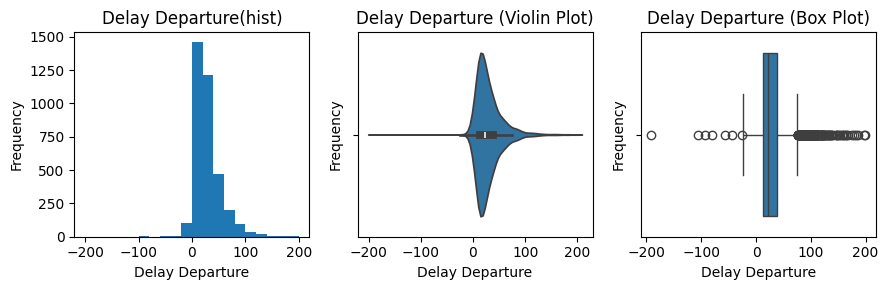

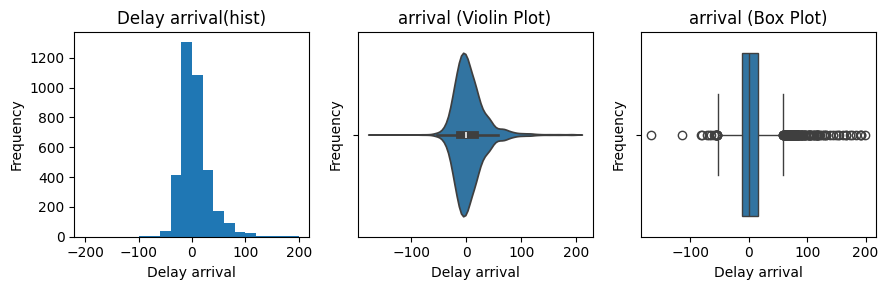

In [13]:
# Load the dataset
data = pd.read_csv('data/flight_Data.csv')

# Filter the "delay_departure" values within the desired range
filtered_data = data[(data['delay_departure'] >= -200) & (data['delay_departure'] <= 200)]

# Create subplots with a single row and three columns
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Plot histogram
axs[0].hist(filtered_data['delay_departure'], bins=20, range=(-200, 200))
axs[0].set_xlabel('Delay Departure')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Delay Departure(hist)')

# Plot violin plot
sns.violinplot(x=filtered_data['delay_departure'], ax=axs[1])
axs[1].set_xlabel('Delay Departure')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Delay Departure (Violin Plot)')

# Plot box plot
sns.boxplot(x=filtered_data['delay_departure'], ax=axs[2], whis=1.5)
axs[2].set_xlabel('Delay Departure')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Delay Departure (Box Plot)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Filter the "delay_departure" values within the desired range
filtered_data = data[(data['delay_arrival'] >= -200) & (data['delay_arrival'] <= 200)]

# Create subplots with a single row and three columns
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Plot histogram
axs[0].hist(filtered_data['delay_arrival'], bins=20, range=(-200, 200))
axs[0].set_xlabel('Delay arrival')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Delay arrival(hist)')

# Plot violin plot
sns.violinplot(x=filtered_data['delay_arrival'], ax=axs[1])
axs[1].set_xlabel('Delay arrival')
axs[1].set_ylabel('Frequency')
axs[1].set_title('arrival (Violin Plot)')

# Plot box plot
sns.boxplot(x=filtered_data['delay_arrival'], ax=axs[2], whis=1.5)
axs[2].set_xlabel('Delay arrival')
axs[2].set_ylabel('Frequency')
axs[2].set_title('arrival (Box Plot)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


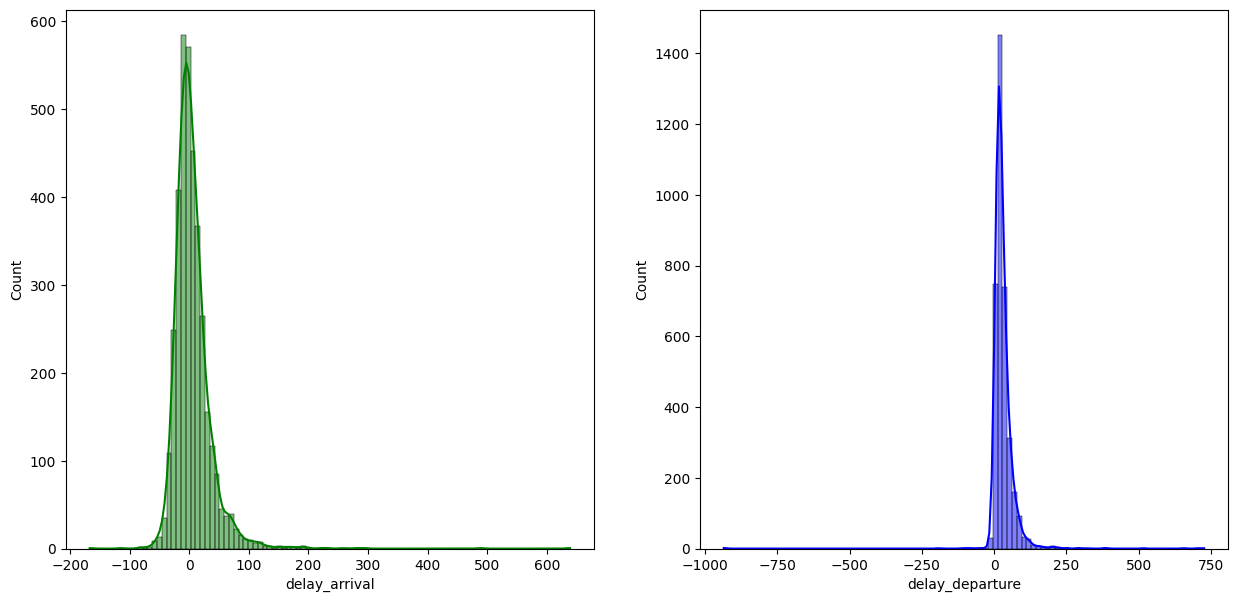

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='delay_arrival',bins=100,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='delay_departure',bins=100,kde=True,color='blue')
plt.show()

### The code performs three separate analyzes and simulations.
We will take from the 2 columns containing the delay times only the values between 200 and (-200)
minutes because most of the information is there and we want an image with a lot of information, in addition, we created a new column which is a circle that is fed in jumps of 20 so that we have order and not scattered times.

#### 2) Two-dimensional visualization:
The code snippet includes two scatter plots to visualize relationships between variables in your project:                       
1) Scatter Plot: WIND_arrival vs. delay_arrival                                                                                 
* It shows the relationship between the 'WIND_arrival' variable and the 'delay_arrival' variable.                           
* The scatter plot displays data points where the x-axis represents 'WIND_arrival' values and the y-axis represents               'delay_arrival' values.                                                                                                   
* The transparency of the data points is set to 0.5 for better visualization.                                               
* The plot provides insights into any potential correlation or pattern between wind conditions during arrival and the -           corresponding delays.                                                                                                         * The y-axis range is limited to -25 to 150 to focus on the relevant data range.    

2) Scatter Plot: delay_departure vs. WIND_departure                                                                             
* It visualizes the relationship between the 'delay_departure' variable and the 'WIND_departure' variable.                     
* The scatter plot shows the distribution of data points with 'WIND_departure' values on the x-axis and 'delay_departure'          values on the y-axis.                                                                                                        
* Data points are semi-transparent (alpha = 0.5) to aid in visual clarity.                                                       
* This plot helps explore any potential correlation or trend between wind conditions during departure and corresponding           departure delays.

The y-axis range is limited to -25 to 150 to focus on the relevant data range.                                                   
These scatter plots provide concise visual summaries of the relationships between wind conditions and arrival/departure delays in your project. They assist in identifying potential associations or patterns between the variables being analyzed.

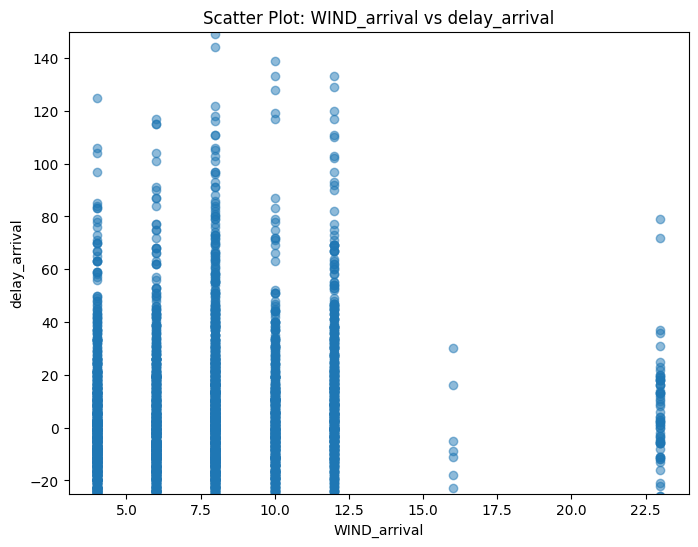

In [14]:
#Two-dimensional visualization

# Select the columns of interest
delay_arrival = data['delay_arrival']
wind_arrival = data['WIND_arrival']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(wind_arrival,delay_arrival, alpha=0.5)
plt.xlabel('WIND_arrival')
plt.ylabel('delay_arrival')
plt.title('Scatter Plot: WIND_arrival vs delay_arrival')
plt.ylim(-25, 150)
plt.show()

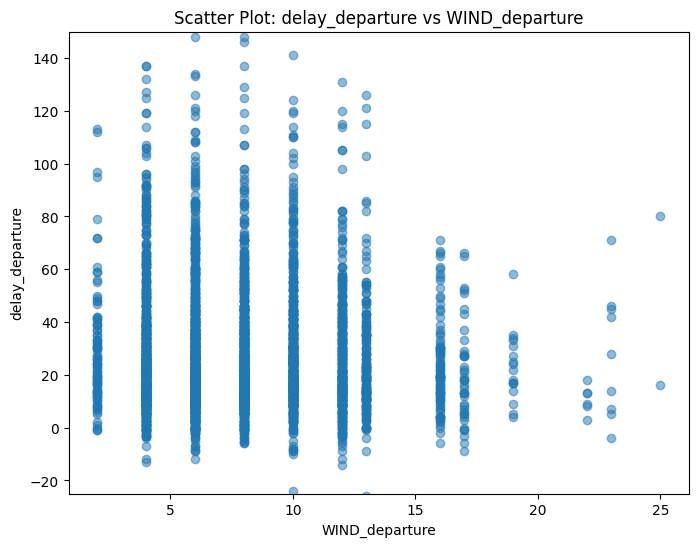

In [15]:
# Select the columns of interest
delay_departure = data['delay_departure']
WIND_departure = data['WIND_departures']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(WIND_departure,delay_departure, alpha=0.5)
plt.xlabel('WIND_departure')
plt.ylabel('delay_departure')
plt.title('Scatter Plot: delay_departure vs WIND_departure')
plt.ylim(-25, 150)  # Set the x-axis limits

plt.show()

#### Pearson :
The code calculates the Pearson correlation coefficient to measure the linear relationship between variables. 

Specifically, it computes correlations for arrival delays with wind conditions, temperature, and scheduled arrival hour. Similarly, it calculates correlations for departure delays with wind conditions, temperature, and scheduled departure hour. These correlations provide insights into how these variables are related to arrival and departure delays.

In [17]:
from scipy.stats import pearsonr

# Select the columns of interest
delay_arrival = data['delay_arrival']
wind_arrival = data['WIND_arrival']

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(wind_arrival, delay_arrival)

print("Pearson Correlation Coefficient between[delay_arrival,WIND_arrival]:", corr)
# Select the columns of interest
delay_arrival = data['delay_arrival']
TEMPERRATURE_arrival = data['TEMPERRATURE_arrival']

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(TEMPERRATURE_arrival, delay_arrival)

print("Pearson Correlation Coefficient between[delay_arrival,TEMPERRATURE_arrival]:", corr)
# Select the columns of interest
delay_arrival = data['delay_arrival']
scheduled_arrival_hour = data['scheduled_arrival_hour']

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(scheduled_arrival_hour, delay_arrival)

print("Pearson Correlation Coefficient between[delay_arrival,scheduled_arrival_hour]:", corr)

Pearson Correlation Coefficient between[delay_arrival,WIND_arrival]: 0.08238526629381805
Pearson Correlation Coefficient between[delay_arrival,TEMPERRATURE_arrival]: -0.13180068767218955
Pearson Correlation Coefficient between[delay_arrival,scheduled_arrival_hour]: 0.1429077811240598


<b>Correlation Heatmap:
* Variables of interest, including 'delay_departure', 'TEMPERRATURE_departures', and 'scheduled_departure_hour', are selected.
* The correlation matrix is computed to measure the relationships between the variables.
* A heatmap is created to visualize the correlation matrix.
  
<b>The second graph is the same, and is for arrival

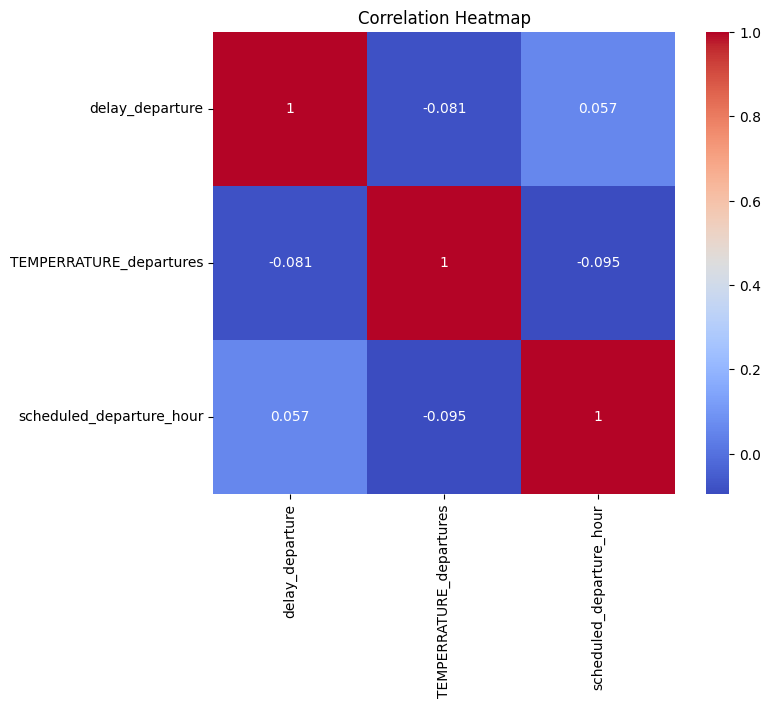

In [18]:
# Select the variables of interest
variables = ['delay_departure', 'TEMPERRATURE_departures', 'scheduled_departure_hour']
selected_data = data[variables]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

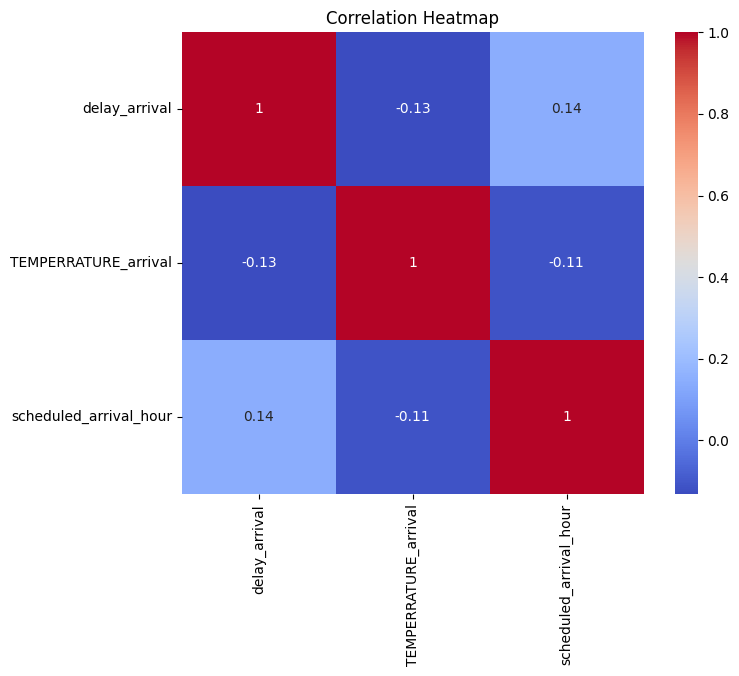

In [19]:
# Select the variables of interest
variables = ['delay_arrival', 'TEMPERRATURE_arrival', 'scheduled_arrival_hour']
selected_data = data[variables]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

#### 3) Multidimensional visualization:


1) 3D Scatter Plot:

* Variables of interest, including 'delay_departure', 'TEMPERRATURE_departures', and 'scheduled_departure_hour', are selected.
* A 3D scatter plot is created to visualize the relationship between the variables.

2) Another 3D Scatter Plot:

* Similar to the previous 3D scatter plot, this section focuses on 'delay_arrival', 'TEMPERRATURE_arrival', and 'scheduled_arrival_hour' variables.


* Similar to the previous correlation heatmap, this section focuses on 'delay_arrival', 'TEMPERRATURE_arrival', and 'scheduled_arrival_hour' variables.

These visualizations and analyses help understand the relationships and patterns in the data. They can be useful for exploratory data analysis and gaining insights into the dataset.

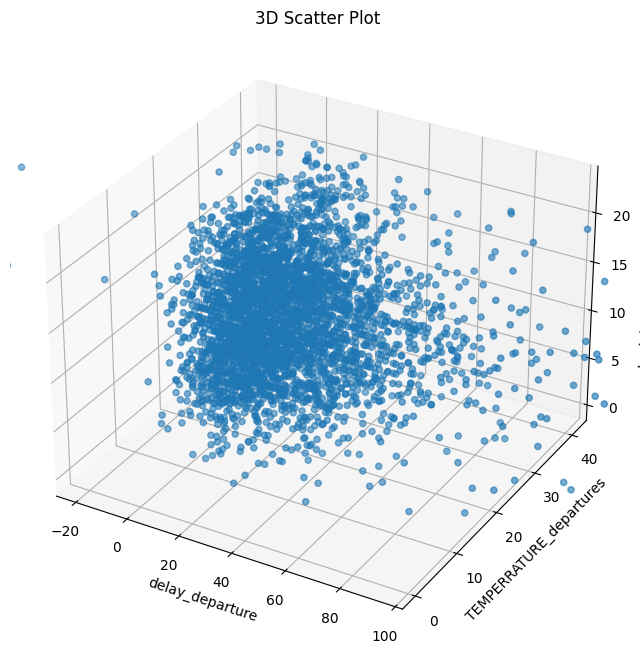

In [21]:
# Select the variables of interest
delay_departure = data['delay_departure']
temperature_departures = data['TEMPERRATURE_departures']
scheduled_departure_hour = data['scheduled_departure_hour']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(delay_departure, temperature_departures, scheduled_departure_hour)

# Set labels and title
ax.set_xlabel('delay_departure')
ax.set_xlim(-25, 100)
ax.set_ylabel('TEMPERRATURE_departures')

ax.set_zlabel('scheduled_departure_hour')

ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

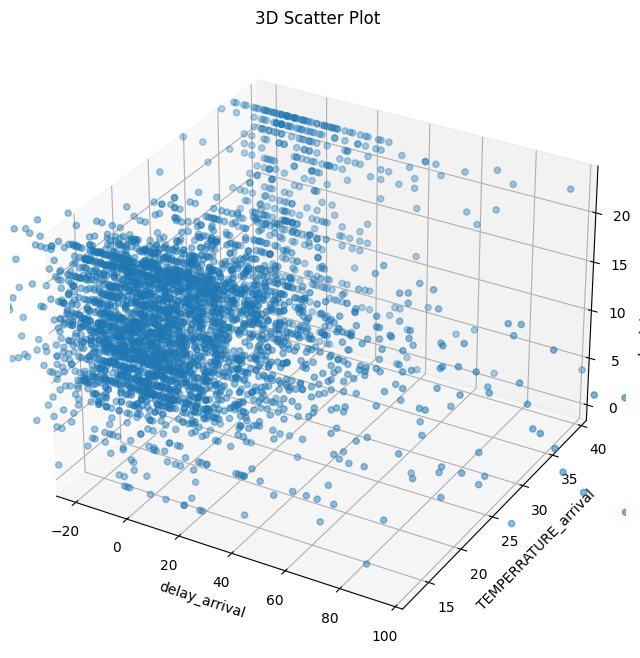

In [22]:
# Select the variables of interest
delay_departure = data['delay_arrival']
temperature_departures = data['TEMPERRATURE_arrival']
scheduled_departure_hour = data['scheduled_arrival_hour']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(delay_departure, temperature_departures, scheduled_departure_hour)

# Set labels and title
ax.set_xlabel('delay_arrival')
ax.set_xlim(-25, 100)
ax.set_ylabel('TEMPERRATURE_arrival')

ax.set_zlabel('scheduled_arrival_hour')

ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

#####  Insights ???????
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.